In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

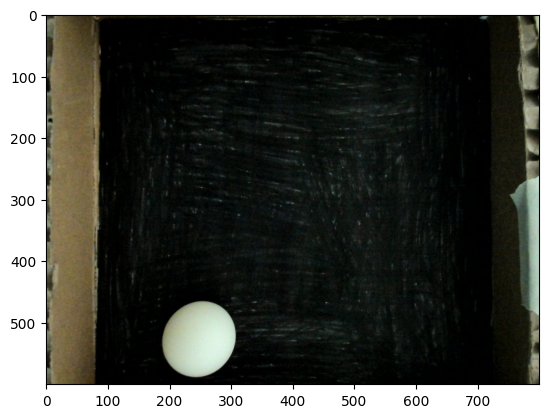

In [45]:
img_bgr = cv2.imread("images/ball_on_plate.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

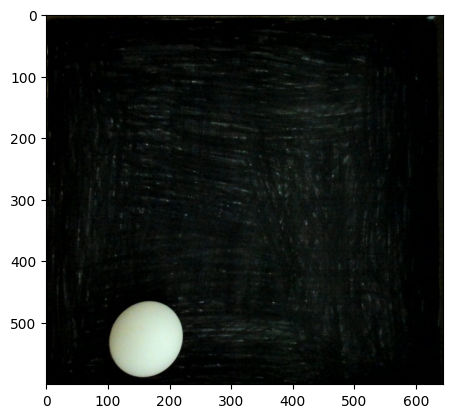

In [46]:
crop_top, crop_left = 0, 86
crop_bottom, crop_right = 0, 70
img_rgb = img_rgb[crop_top:img_rgb.shape[0] - crop_bottom, crop_left:img_rgb.shape[1] - crop_right]

plt.imshow(img_rgb)
plt.show()

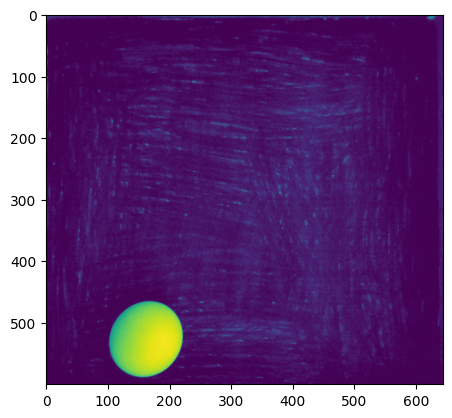

In [47]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray)
plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


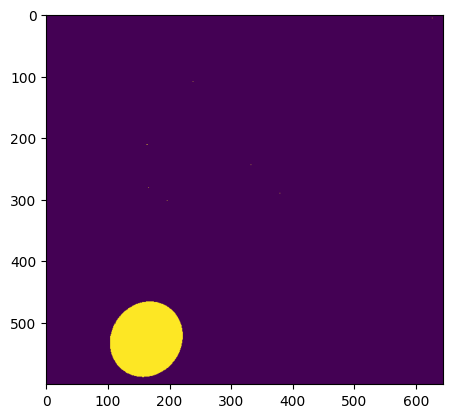

In [68]:
_, tresh = cv2.threshold(img_gray, 120, 255, cv2.THRESH_BINARY)

print(tresh)

plt.imshow(tresh)
plt.show()

In [69]:
contours, _ = cv2.findContours(tresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"contours: {len(contours)}")

contours: 8


area: 11130.5
center: (162, 527)
radius: 63


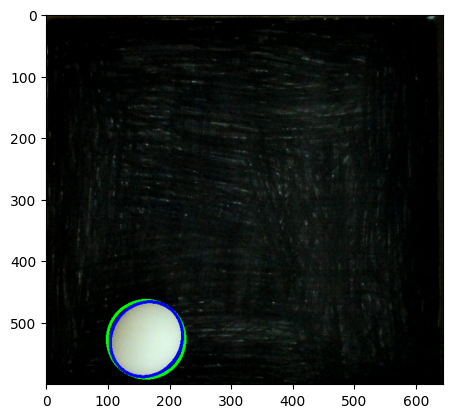

In [71]:
img_rgb_copy = img_rgb.copy()
if contours:
    # Bekomme die größte contour
    largest_contour = max(contours, key=cv2.contourArea)

    # Erhalten den bereich der Contour
    area = cv2.contourArea(largest_contour)
    print(f"area: {area}")

    # Bekomme die x, y koordinate und den radius
    (x,y), radius = cv2.minEnclosingCircle(largest_contour)

    # Da float, in int umwandeln
    center = (int(x), int(y))
    radius = int(radius)

    print(f"center: {center}")
    print(f"radius: {radius}")

    # Zeichne Kreis
    cv2.circle(img_rgb_copy, center, radius, (0, 255, 0), 4)

    ellipse = cv2.fitEllipse(largest_contour)

    cv2.ellipse(img_rgb_copy, ellipse, (0, 0, 255), 4)

# bild anzeigen
plt.imshow(img_rgb_copy)
plt.show()